# Twitter Sentiment Analysis.

In [33]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [34]:
df = pd.read_csv('Twitter_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


array([[<Axes: title={'center': 'category'}>]], dtype=object)

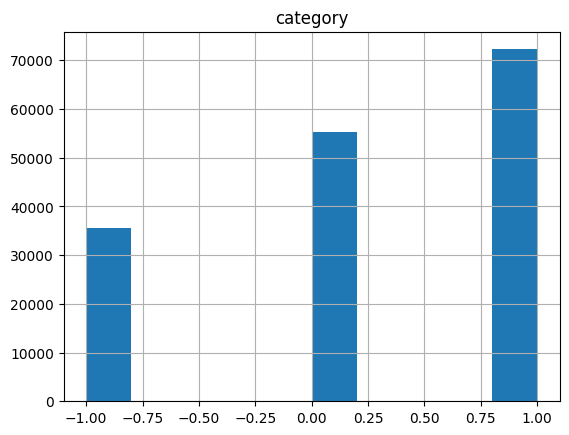

In [35]:
# Visualize the data using a histogram
df.hist(column='category', )

## Cleaning the data

In [36]:
# Clreaning the data
# Remove special characters, links, and usernames using regex
df['clean_text'] = df['clean_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'@\S+', '', regex=True).replace(r'[^a-zA-Z\s]', '', regex=True).replace(r'\n', '', regex=True).replace(r'\s+', ' ', regex=True).replace(r'^\s+', '', regex=True).replace(r'\s+$', '', regex=True)


# Drop null values
df.dropna(inplace=True)


x = df['clean_text']
y = df['category']

df

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these crores paid neerav modi not recovere...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [37]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(<130375x115148 sparse matrix of type '<class 'numpy.int64'>'
 	with 2346281 stored elements in Compressed Sparse Row format>,
 <32594x115148 sparse matrix of type '<class 'numpy.int64'>'
 	with 589184 stored elements in Compressed Sparse Row format>,
 63425     1.0
 78455     0.0
 70129     1.0
 157073    1.0
 120885    1.0
          ... 
 119880    0.0
 103695    0.0
 131934    1.0
 146869    1.0
 121959    1.0
 Name: category, Length: 130375, dtype: float64,
 42229     0.0
 22035     1.0
 79982    -1.0
 118493   -1.0
 12815     0.0
          ... 
 47105     1.0
 33632    -1.0
 93676     0.0
 37757     0.0
 132997    1.0
 Name: category, Length: 32594, dtype: float64)

## Naive Bayes Classifier

In [38]:
# Training the model using Naive Bayes Classifier.
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [39]:
# Predicting the model
y_pred = model.predict(x_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7427440633245382


In [40]:
# Test custom tweets
custom_tweet = "I feel aversion from people"
custom_tweet = vectorizer.transform([custom_tweet]) # vectorizing
prediction = model.predict(custom_tweet)

print(prediction)

[1.]


## Logistic Regression

In [41]:
# Try another model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    multi_class='multinomial'
)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [42]:
# Predicting the model
y_pred = model.predict(x_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9403264404491625


In [43]:
# Test custom tweets
custom_tweet = "The people are hateful"
custom_tweet = vectorizer.transform([custom_tweet]) # vectorizing
prediction = model.predict(custom_tweet)

print(prediction)

[0.]
